# Problem 1

In [1]:
import numpy as np
import math
import pandas as pd
import array as arr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statistics import mean

In [2]:
L1 = (3e8)*(13.7e9) #speed of light in m/s of present observable universe
L2 = (3e8)*(4.5e9) #speed of light in m/s of universe 4.5 Gyr
sigma = math.pi*(7e5)**2 #cross sectional area of star and radius of sun for reference in m/s
n = 1e9 #number density of stars in the universe in Mpc^3

The number of stars projected on the night sky will have a variations of distances, since some stars will abstruct the line of sight. Nearby stars will hide the distant ones, which will only allow us a 2d view. To obtain a full assumption of how many stars are actually shown within a region of the sky, I have to consider the surface area of our line of sight that is viewing the stars over the area of the sky. $$F =\frac{nLA\sigma}{A} $$ To get the sky coverage as a function of time. $$f(t) = nL\sigma = n(c\Delta t)\sigma$$
I say L is equal to $c\Delta t$ because if the stars first begin to shine some years after the early uiverse, wouldn't the change in time vary. The time for the stars to shine would roughly be around 5 billion years after the first set of stars and galaxies.

In [3]:
#convert the hubble law to correct units in Mpc
hubble = 73*(1/3.1e19) #multiply 73km/s to 1 Mpc/3.1e19 km
t = (1/hubble)*3.2e-17 #convert answer from s to Gyr for entire sky covered
t2 = (0.5/hubble)*3.2e-17 #convert answer from s to Gyr for half of sky covered

#calculate the age of universe when sky is covered:
print(f"The universe is", round(t),"Gyr when the entire sky is covered.")
print(f"The universe is", round(t2), "Gyr when the entire sky is half covered.")

The universe is 14 Gyr when the entire sky is covered.
The universe is 7 Gyr when the entire sky is half covered.


In [4]:
f2 = n*(3e8)*(14e9)*sigma # fraction of universe at 14 Gyr
print(f"The fraction of the sky covered at", round(t),"Gyr is", round(f2))
f3 = n*(3e8)*(7e9)*sigma #fraction of universe at 7 Gyr
print(f"The fraction of the sky covered at", round(t2), "Gyr is", round(f3))

The fraction of the sky covered at 14 Gyr is 6465397681087793862979249606948265394176
The fraction of the sky covered at 7 Gyr is 3232698840543896931489624803474132697088


In [5]:
#calculate the fraction of the sky coverage when stars shine 13 Gyr and the Earth first formed
f=(n*L1*sigma)*100
print(f"The fraction of the sky covered at 13 Gyr is", round(f))
f1=(n*L2*sigma)*100
print(f"The fraction of the sky covered at 4.5 Gyr is", round(f1))

The fraction of the sky covered at 13 Gyr is 632685344506448358345205844639688316420096
The fraction of the sky covered at 4.5 Gyr is 207816354034964790649360541219902497751040


To determine the age of the universe we have to use the Hubble Law to measure cosmological distances: $$t=\frac{1}{H_0}$$ The Hubble constant used: 73 km/s. This tells us the universe is expanding and has been constant, if we agree with this statement there are two way to understand this law. If we compute a young age, this will tell us that the universe is expanding at a faster rate and it takes a shorter time for our stars to expand large distances. However, if the age is a bit older, we can not a much slower expansion where the stars are slowing expanding over a much longer time. For stars covering the sky, the age of the universe appears to be 14 Gyr and for the stars covering half the sky is 7 Gyr.

To calculate the fraction of sky coverage at speific times, we use the formula from Part A. The fraction of the sky that is covered by stars shining for only 13 Gyr is 6.3 % and at 4.5 Gyr is 2.1%. The fraction of stars that are fully covering the sky at 14 Gyr is 6.4% and at 7 Gyr is 3.2%. However, these values for the fracion of the sky are incorrect, as the fraction of the total surface that is covered should be 1 indicating my values ought to be between 0 and 1. I used the correct formula $f(t) =nL(c\Delta t)\sigma$ however, the values are not correct. I want to say my L1 and L2 are somehow incorrect in some fashion as the fractions of sky coverage in the graph is clear visualization of this reasoning.



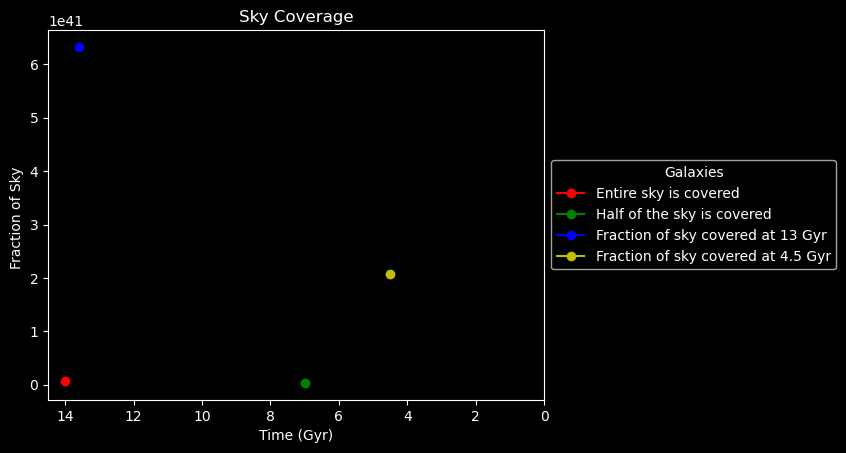

In [6]:
plt.style.use('dark_background')

plt.plot(14,f2,'r', marker='o', label='Entire sky is covered')
plt.plot(7,f3, 'g', marker ='o', label='Half of the sky is covered')
plt.plot(13.6,f, 'b', marker= 'o', label='Fraction of sky covered at 13 Gyr')
plt.plot(4.5,f1, 'y', marker = 'o', label='Fraction of sky covered at 4.5 Gyr')

plt.xlabel('Time (Gyr)')
plt.ylabel('Fraction of Sky ')
plt.title('Sky Coverage')
plt.legend(title="Galaxies", title_fontsize=10, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

#plt.ylim([0,9])
plt.xlim([14.5,0])
#plt.ylim([0,1])
#plt.gca().invert_yaxis()


plt.show()

# Problem 2

In [7]:
#read in files
data=np.genfromtxt('Universe_motions_01.txt', skip_header=1, dtype=float)
data1=np.genfromtxt('Universe_motions_02.txt', skip_header=1, dtype=float)
data2=np.genfromtxt('Universe_motions_03.txt', skip_header=1, dtype=float)

In [8]:
#Extract original distance and velocity of the galaxies 
dist=data[:,0]
vel=data[:,2]
#Extract errors for othe velocities and distance
dist_err=data[:,1]
vel_err=data[:,3]

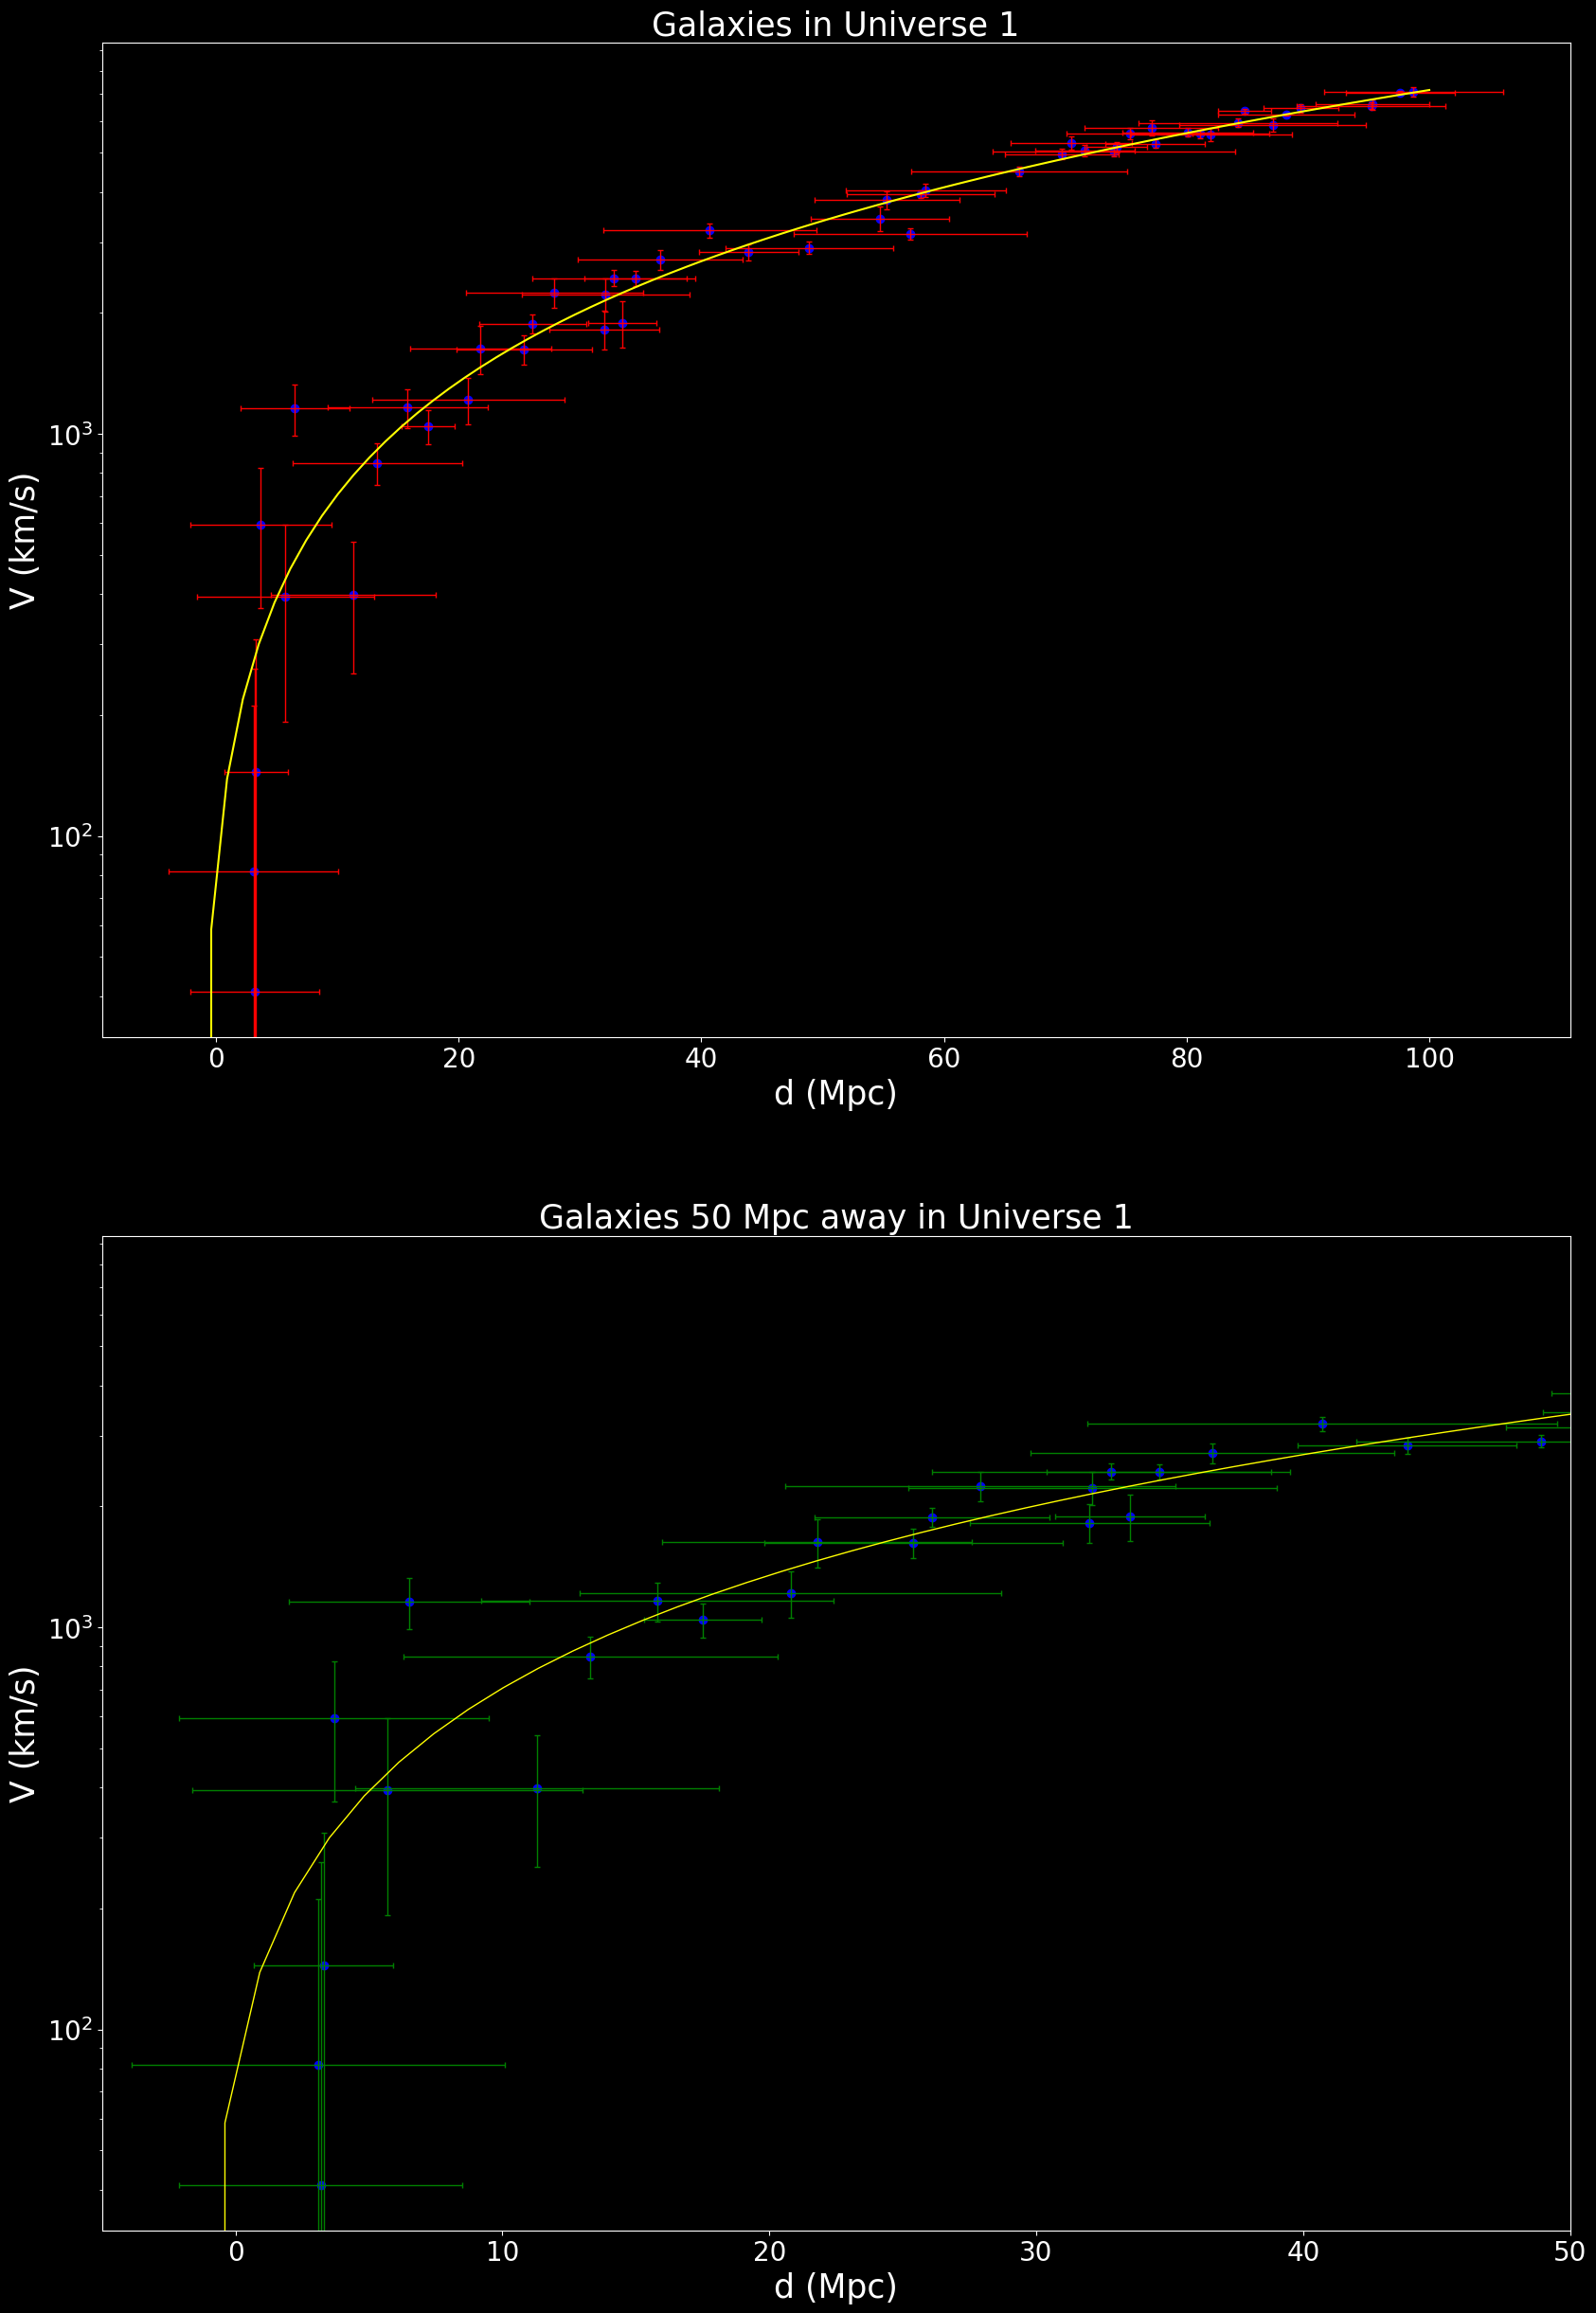

In [9]:
#plt.style.use('dark_background')
fig = plt.figure(figsize=(20,30))

#fit a polynomial over the distances
a, b, c = np.polyfit(dist, vel, 2)

x = np.linspace(-3,100,80)
y = a*np.square(x)+b*x+c

plt.subplot(211)
#plot original velocities and distances
plt.scatter(dist,vel, color='b', marker="o")

#plot the uncertainties
plt.errorbar(dist, vel, yerr=vel_err, xerr=dist_err, color='r', ls='none', elinewidth=1, capsize=2) 
plt.plot(x, y, c='yellow',linestyle='-')

plt.xlabel('d (Mpc)', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('V (km/s)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Galaxies in Universe 1', fontsize=25)
plt.yscale('log')

plt.subplot(212)
#plot original velocities and distances
plt.scatter(dist,vel, color='b', marker="o", label='original')
#plot the uncertainties
plt.errorbar(dist, vel, yerr=vel_err, xerr=dist_err, color='g', ls='none',elinewidth=1, capsize=2)
plt.plot(x, y, color='yellow', linestyle='-', linewidth=1)

plt.xlabel('d (Mpc)', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('V (km/s)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Galaxies 50 Mpc away in Universe 1', fontsize=25)
plt.yscale('log')  
plt.xlim([-5,50])
#plt.ylim([0,4e3])


plt.show()

In [10]:
#Extract original distance and velocity of the galaxies 
dist1=data1[:,0]
vel1=data1[:,2]
#Extract errors for othe velocities and distance
dist_err1=data1[:,1]
vel_err1=data1[:,3]

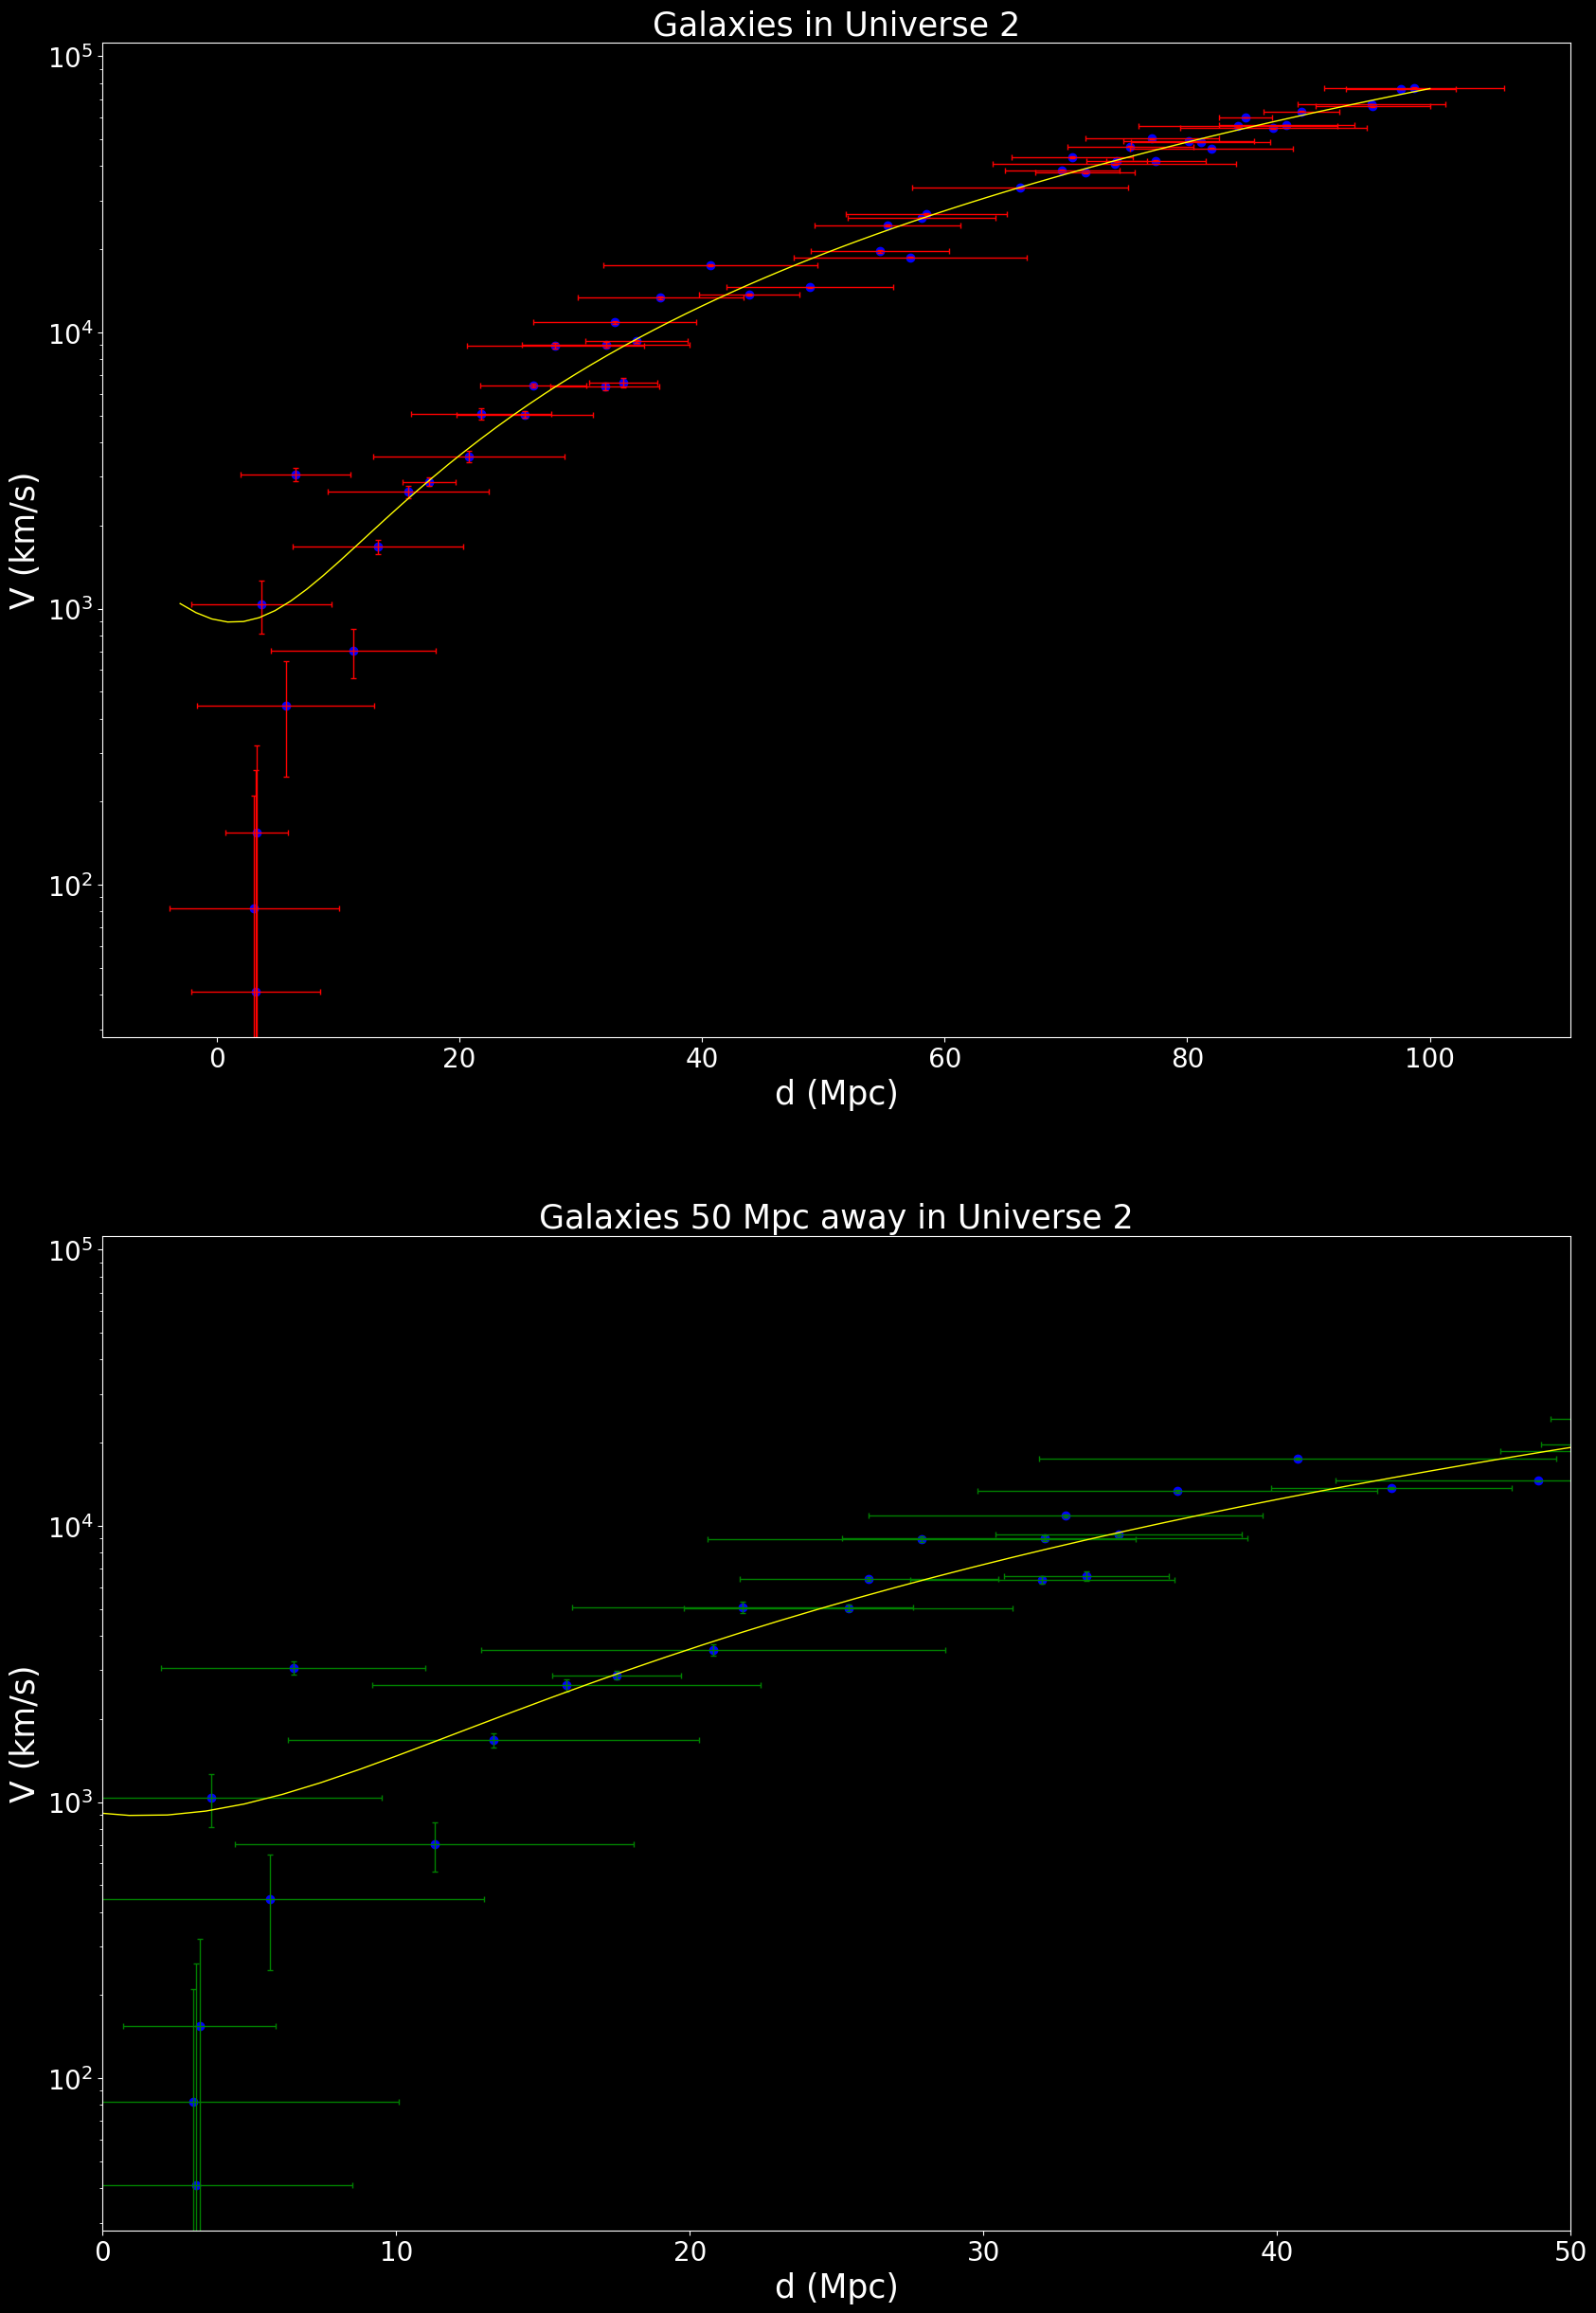

In [11]:
#plt.style.use('dark_background')
fig = plt.figure(figsize=(20,30))

#fit a polynomial over the distances
a, b, c = np.polyfit(dist1, vel1, 2)

u = np.linspace(-3,100,80)
y = a*np.square(x)+b*x+c

plt.subplot(211)
#plot original velocities and distances
plt.scatter(dist1,vel1, color='b', marker="o")

#plot the uncertainties
plt.errorbar(dist1, vel1, yerr=vel_err1, xerr=dist_err1, color='r', ls='none', elinewidth=1, capsize=2) 
plt.plot(x, y, color='yellow', linestyle='-', linewidth=1)

plt.xlabel('d (Mpc)', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('V (km/s)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Galaxies in Universe 2', fontsize=25)
plt.yscale('log')


plt.subplot(212)
#plot original velocities and distances
plt.scatter(dist1,vel1, color='b', marker="o", label='original')

#plot the uncertainties
plt.errorbar(dist1, vel1, yerr=vel_err1, xerr=dist_err1, color='g', ls='none',elinewidth=1, capsize=2)
plt.plot(x, y, color='yellow', linestyle='-', linewidth=1)

plt.xlabel('d (Mpc)', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('V (km/s)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Galaxies 50 Mpc away in Universe 2', fontsize=25)
plt.yscale('log')  
plt.xlim([0,50])

#plt.ylim([0,4e3])


plt.show()

In [12]:
#Extract original distance and velocity of the galaxies 
dist2=data2[:,0]
vel2=data2[:,2]
#Extract errors for othe velocities and distance
dist_err2=data2[:,1]
vel_err2=data2[:,3]

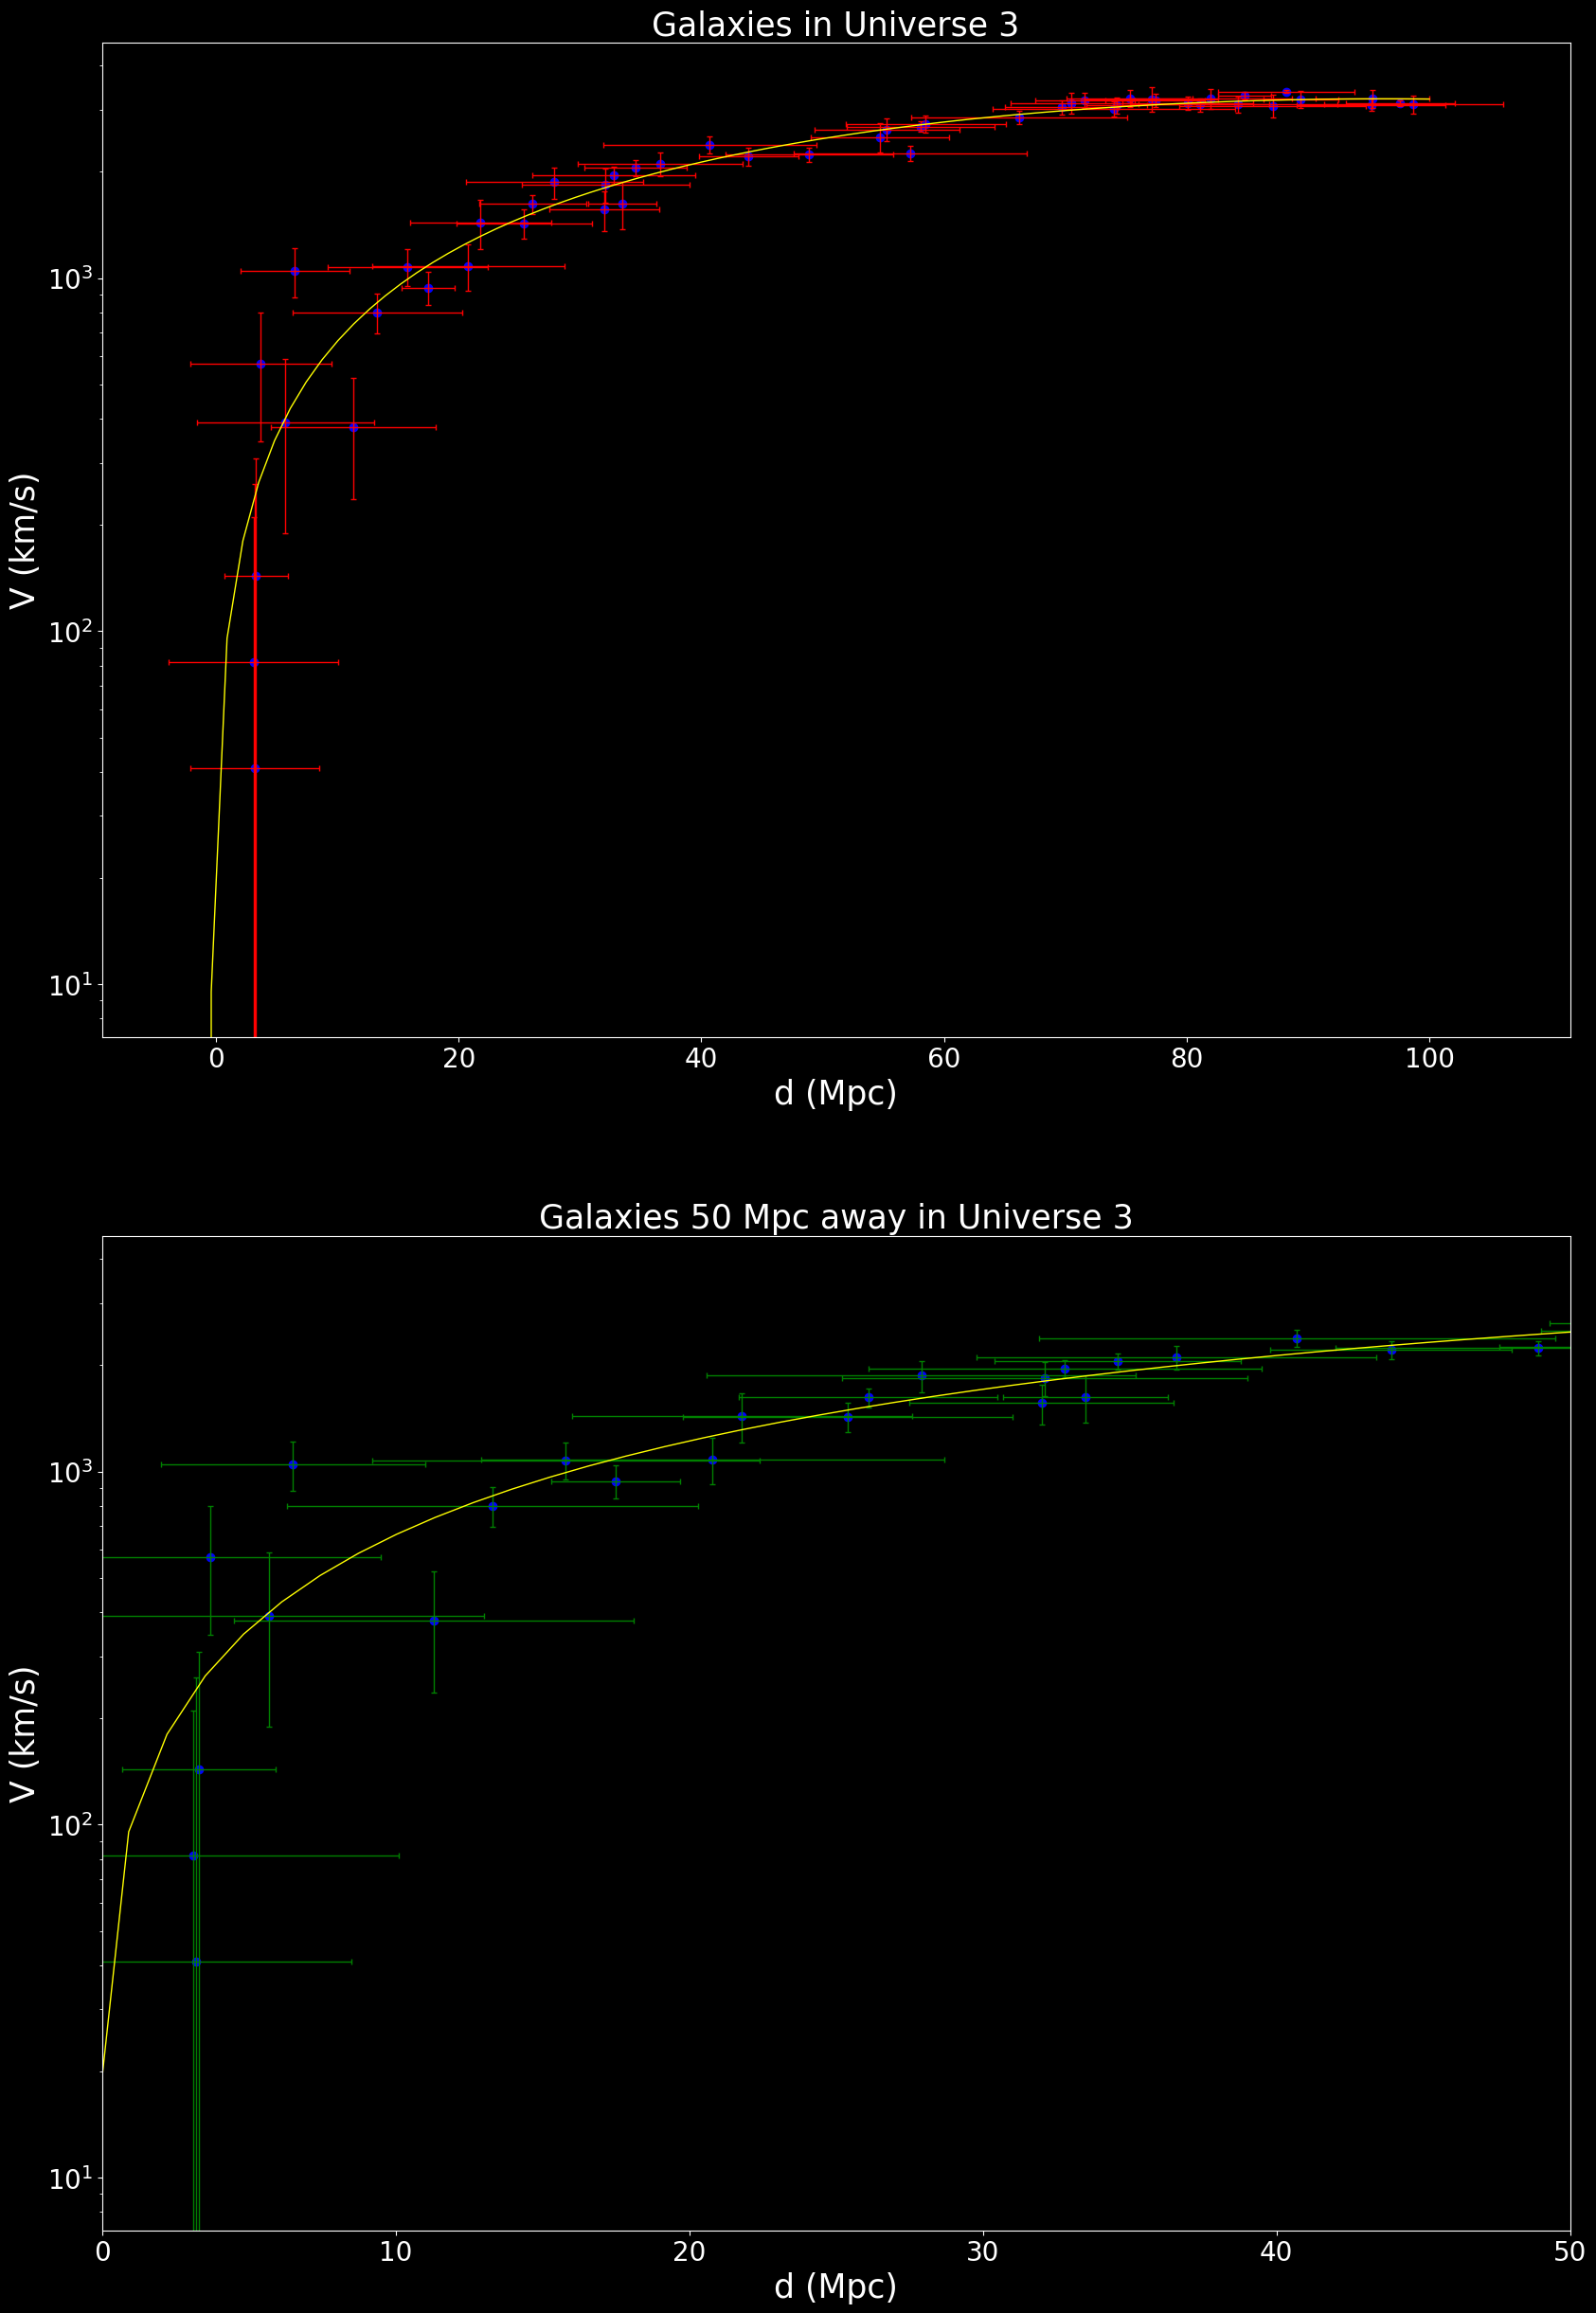

In [13]:
#plt.style.use('dark_background')
fig = plt.figure(figsize=(20,30))

#fit a polynomial over the distances
a, b, c = np.polyfit(dist2, vel2, 2)

x = np.linspace(-3,100,80)
y = a*np.square(x)+b*x+c

plt.subplot(211)
#plot original velocities and distances
plt.scatter(dist2,vel2, color='b', marker="o")
#plot the uncertainties
plt.errorbar(dist2, vel2, yerr=vel_err2, xerr=dist_err2, color='r', ls='none', elinewidth=1, capsize=2) 
plt.plot(x, y, color='yellow', linestyle='-', linewidth=1)

plt.xlabel('d (Mpc)', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('V (km/s)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Galaxies in Universe 3', fontsize=25)
plt.yscale('log')


plt.subplot(212)
#plot original velocities and distances
plt.scatter(dist2,vel2, color='b', marker="o", label='original')
#plot the uncertainties
plt.errorbar(dist2, vel2, yerr=vel_err2, xerr=dist_err2, color='g', ls='none',elinewidth=1, capsize=2)
plt.plot(x, y, color='yellow', linestyle='-', linewidth=1)

plt.xlabel('d (Mpc)', fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('V (km/s)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Galaxies 50 Mpc away in Universe 3', fontsize=25)
plt.yscale('log')  
plt.xlim([0,50])

#plt.ylim([0,4e3])


plt.show()

In [14]:
#Determine rough ages of these universe
slope = mean(vel)/mean(dist) # find slope (H0) in km/s/Mpc by computing mean distance and velocity
slope1 = mean(vel1)/mean(dist1) # find slope (H0) in km/s/Mpc by computing mean distance and velocity
slope2 = mean(vel2)/mean(dist2) # find slope (H0) in km/s/Mpc by computing mean distance and v
print(slope)
print(slope1)
print(slope2)

#convert the hubble law to correct units in Mpc for Universe 1
convert = slope*(1/3.1e19) #multiply slope to 1 Mpc/3.1e19 km
age = (1/convert)*3.2e-17 #convert answer from s to Gyr for entire sky covered 
#convert the hubble law to correct units in Mpc for Universe 2
convert_1 = slope1*(1/3.1e19)
age1 = (1/convert_1)*3.2e-17
#convert the hubble law to correct units in Mpc for Universe 3
convert_2 = slope2*(1/3.1e19)
age2 = (1/convert_2)*3.2e-17


print("Universe 1 is ~", round(age), "Gyr")
print("Universe 2 is ~", round(age1), "Gyr")
print("Universe 3 is ~", round(age2), "Gyr")


Universe 1 is ~ 14 Gyr
Universe 2 is ~ 2 Gyr
Universe 3 is ~ 23 Gyr


As we look further into a universe's past we look at objects at a larger distance from us. The plots are indicating that all three universes are expanding at varying rates. By attributing the three different hubble constants obtained from above, Universe 1 = 69.5, Universe 2 = 532.9, and Universe 3 = 43.1, from the slopes we can ascertain the correct ages for these universes. The constant slopes indicates that the expansion rates are constant starting from the observer, us and moivng outward. In Universe 1, the galaxies are moving away from us at a steady slope that is increasing, whereas in Universe 2 and 3, it varies. If we were to look at similar models of our own universe on a cosmological scale, we can see a similiarity in expansion an say this a good prediction to the age of this universe. The rough age for this universe seems to be similiar to our own universe, ~ 14 Gyr. Universe 2 expansion rate proves to be steeper than the first and third universe. The rate at which these galaxies are moving is based on the the velocities gradually increasing in the past and eventually slowing down to create a shallow slope. It's approximate age is ~ 2 Gyr. This indicates the universe is in the early stages of formation and forming rapidly after it's own "Big Bang" and eventually cooling down. Universe 3 indicates that the galaxies are increasing at a faster rate as noted by the less distant galaxies before the curve. Since this universe is rapidly increasing, the approximate age is ~ 23 Gyr which follows the right assumption that the galaxies are growing further apart if we were to be observing from Universe 3. 



43.10491352201257
